# Chapter 1

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Ex. 1-1

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [7]:
import nsfg

In [8]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [10]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [12]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [14]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [16]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [18]:
pregordr[0]

1

Select a slice from a column.

In [20]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [22]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [24]:
preg.outcome.value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

Check the values of another variable.

In [26]:
preg.birthwgt_lb.value_counts().sort_index()

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: count, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [28]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [31]:
# Print value counts, sort for readability
preg.birthord.value_counts().sort_index()

birthord
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

We can also use `isnull` to count the number of nans.

In [33]:
# Count the number of not a number entries in the dataframe
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [35]:
# Print value counts, sort for readability
preg.prglngth.value_counts().sort_index()

prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [37]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [39]:
# Create new column for weight in kilograms
preg['totalwgt_kg'] = preg.totalwgt_lb*0.453592
# Find the mean of the new column
preg.totalwgt_kg.mean()

3.2956309433502984

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [41]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [42]:
# New data frame for the responses
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [44]:
# Display first five rows of the dataframe
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [46]:
# Print value counts, sort for readability
resp.age_r.value_counts().sort_index()
# 15 is the youngest
# 44 is the oldest

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [48]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [50]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [52]:
# Find the data for respondent with caseid 1
resp[resp.caseid==1].age_r
# Respondent is 44 years old

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [54]:
# We know there are four entries for this respondent with corresponding index numbers 2610-2613
len_2298 = preg[2610:2614]
# Output all four values of pregnancy length
len_2298['prglngth']

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5013?

In [56]:
# Create new dataframe for respondent 5013
frst_5013 = preg[preg.caseid==5013]
# Output all birth weight results for respondent 5013
frst_5013['birthwgt_lb']
# The first baby was 7lbs

5516    7.0
5517    NaN
5518    8.0
5519    8.0
Name: birthwgt_lb, dtype: float64

In [57]:
# By using this and statement we require our output to be from the respondent with caseid 5013 
# and by selecting the pregnancy order to be the first pregnancy we ensure we're getting the first baby's birth weight
preg[(preg.caseid==5013) & (preg.pregordr==1)].birthwgt_lb

5516    7.0
Name: birthwgt_lb, dtype: float64

### Ex. 1-2

In [59]:
import sys
import numpy as np
import thinkstats2

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.items():
        d[caseid].append(index)
    return d




def main():
    # Read the respondent file
    resp = ReadFemResp()
    print("Shape of respondent file is: ", resp.shape)
    
    # Read the pregnancy file
    preg = ReadFemPreg()
    print("Shape of pregnancy file is: ", preg.shape)
 
    # Print value counts of respondent file sort for readability
    print(resp.pregnum.value_counts().sort_index())

    # Compare number of pregnancies from respondant file to pregnancy file
    if resp.pregnum.sum() == preg.shape[0]:
        print("Number of pregnancies match and the total is: ", resp.pregnum.sum(), " pregnancies.")
        pass
    else:
        print("Number of pregnancies do not match")
        pass
    
    # Map values from caseid to indices in pregnancy file
    map = nsfg.MakePregMap(preg)
    print(map)

if __name__ == '__main__':
    main()

Shape of respondent file is:  (7643, 3087)
Shape of pregnancy file is:  (13593, 244)
pregnum
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: count, dtype: int64
Number of pregnancies match and the total is:  13593  pregnancies.
defaultdict(<class 'list'>, {1: [0, 1], 2: [2, 3, 4], 6: [5, 6, 7], 7: [8, 9], 12: [10], 14: [11, 12, 13], 15: [14, 15, 16], 18: [17, 18], 21: [19, 20], 23: [21, 22], 24: [23, 24, 25], 28: [26], 31: [27, 28, 29], 36: [30, 31], 38: [32, 33, 34], 39: [35, 36], 44: [37, 38, 39, 40], 45: [41], 46: [42, 43], 49: [44, 45, 46, 47], 51: [48, 49, 50], 52: [51], 57: [52, 53, 54], 60: [55, 56], 63: [57, 58, 59], 69: [60], 70: [61, 62, 63, 64], 71: [65], 72: [66, 67], 73: [68, 69], 77: [70, 71], 80: [72, 73, 74, 75, 76], 81: [77], 86: [78, 79, 80], 90: [81, 82], 91: [83, 84, 85, 86, 87, 88, 89], 92: [90, 91, 92], 95: [93, 94], 101: [95, 96], 106: [97, 9

#### Ex. 2-1
You could use the mean and standard deviation of the pregnancy term to put this information on the news. That would provide hard numbers that you could present to the audience. 
To reassure an anxious patient, tell them the minimum or maximum number of weeks carrying babies to term resulted in a live birth in this dataset. This will give them reassurance that their baby can be born early or late and still be okay.

While this dataset does not support the claim that first babies arrive late, it does support the claim that they arrive slightly early but later than other babies. The mean when the first babies are born is 38.601 weeks in this dataset, while other babies are born at 38.523 weeks. There is no enormous difference; it is only about 13 hours when doing the math. That said, the standard deviation is 2.7 weeks for all live births; this indicates that births from 35.9 weeks to 41.3 weeks account for roughly 68% of all births. 95% of all births fall within 33.2 - 44.0 weeks. With the mean time of first babies being born at 38.601 weeks, the distribution is centering around that, and therefore, there is a better chance of first babies being born early rather than late. 

### Ex. 2-4

In [62]:
# Import necessary library
import thinkplot

In [63]:
# Create Cohen's Effect size function
def cohen(group1, group2):
    # Calculate the difference between the means of the two series of interest
    diff = group1.mean() - group2.mean()

    # Find the variance of the two series
    vari1 = group1.var()
    vari2 = group2.var()

    # Find the number of terms in the series
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled variance
    pooled_vari = (n1 * vari1 + n2 * vari2)/(n1 + n2)

    # Calculate Cohen's d
    d = diff/np.sqrt(pooled_vari)
    return d

In [64]:
# Make the pregnancy dataframe
preg = nsfg.ReadFemPreg()
# Select only the live births
live = preg[preg.outcome == 1]
# Select only the firstborns
first_born = live[live.birthord == 1]
# Select every entry that's not a firstborn
not_first = live[live.birthord != 1]

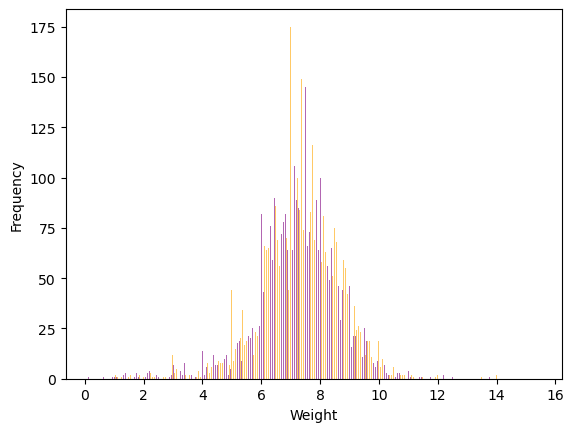

<Figure size 800x600 with 0 Axes>

In [65]:
# Use thinkplot package to print a histogram
first_born_hist = thinkstats2.Hist(first_born.totalwgt_lb)
not_first_hist = thinkstats2.Hist(not_first.totalwgt_lb)
width = 0.018
thinkplot.PrePlot(2)
thinkplot.Hist(first_born_hist, align = 'left', width = width, color = 'purple')
thinkplot.Hist(not_first_hist, align = 'right', width = width, color = 'orange')
thinkplot.Show(xlabel = 'Weight', ylabel = 'Frequency')

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import matplotlib.pylab

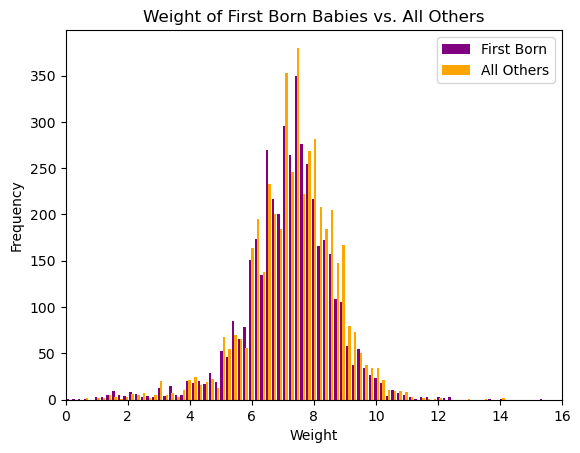

In [67]:
# Use matplotlib to print a histogram
bins = np.linspace(0, 16, 88)
plt.hist([first_born.totalwgt_lb, not_first.totalwgt_lb], label = ['First Born', 'All Others'], bins = bins, color = ['purple', 'orange'], width = 0.08)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight of First Born Babies vs. All Others')
plt.legend()
plt.xlim(0, 16)
plt.show()

In [68]:
# Print Cohen's d for total weight
print(cohen(first_born.totalwgt_lb, not_first.totalwgt_lb))

-0.088672927072602


In [69]:
# Print Cohen's d for pregnancy length
print(cohen(first_born.prglngth, not_first.prglngth))

0.028879044654449883


The larger magnitude of Cohen's d in comparing weights versus comparing pregnancy term lengths means that being firstborn affects their weights more than their pregnancy term length. Looking at the negative value we obtained for Cohen's d, we know that the mean of firstborn weights is smaller than the mean for all others. Following the logic, we can say that firstborns are more likely to be lighter than they are to have a more prolonged pregnancy. The Cohen difference is still at only 0.089, which is very small, so they're not highly likely to be lighter but rather only slightly more likely.